In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier

import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [21]:
df = pd.read_csv('data/UCI_Credit_Card.csv')

In [22]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [23]:
df.rename(columns= {"default.payment.next.month":"default_P","PAY_0":"REPAYMENT STATUS"}, inplace = True)

In [24]:
df['EDUCATION'].replace({"5":4,"6":4},inplace = True)
df['MARRIAGE'].replace({"3":2},inplace = True)

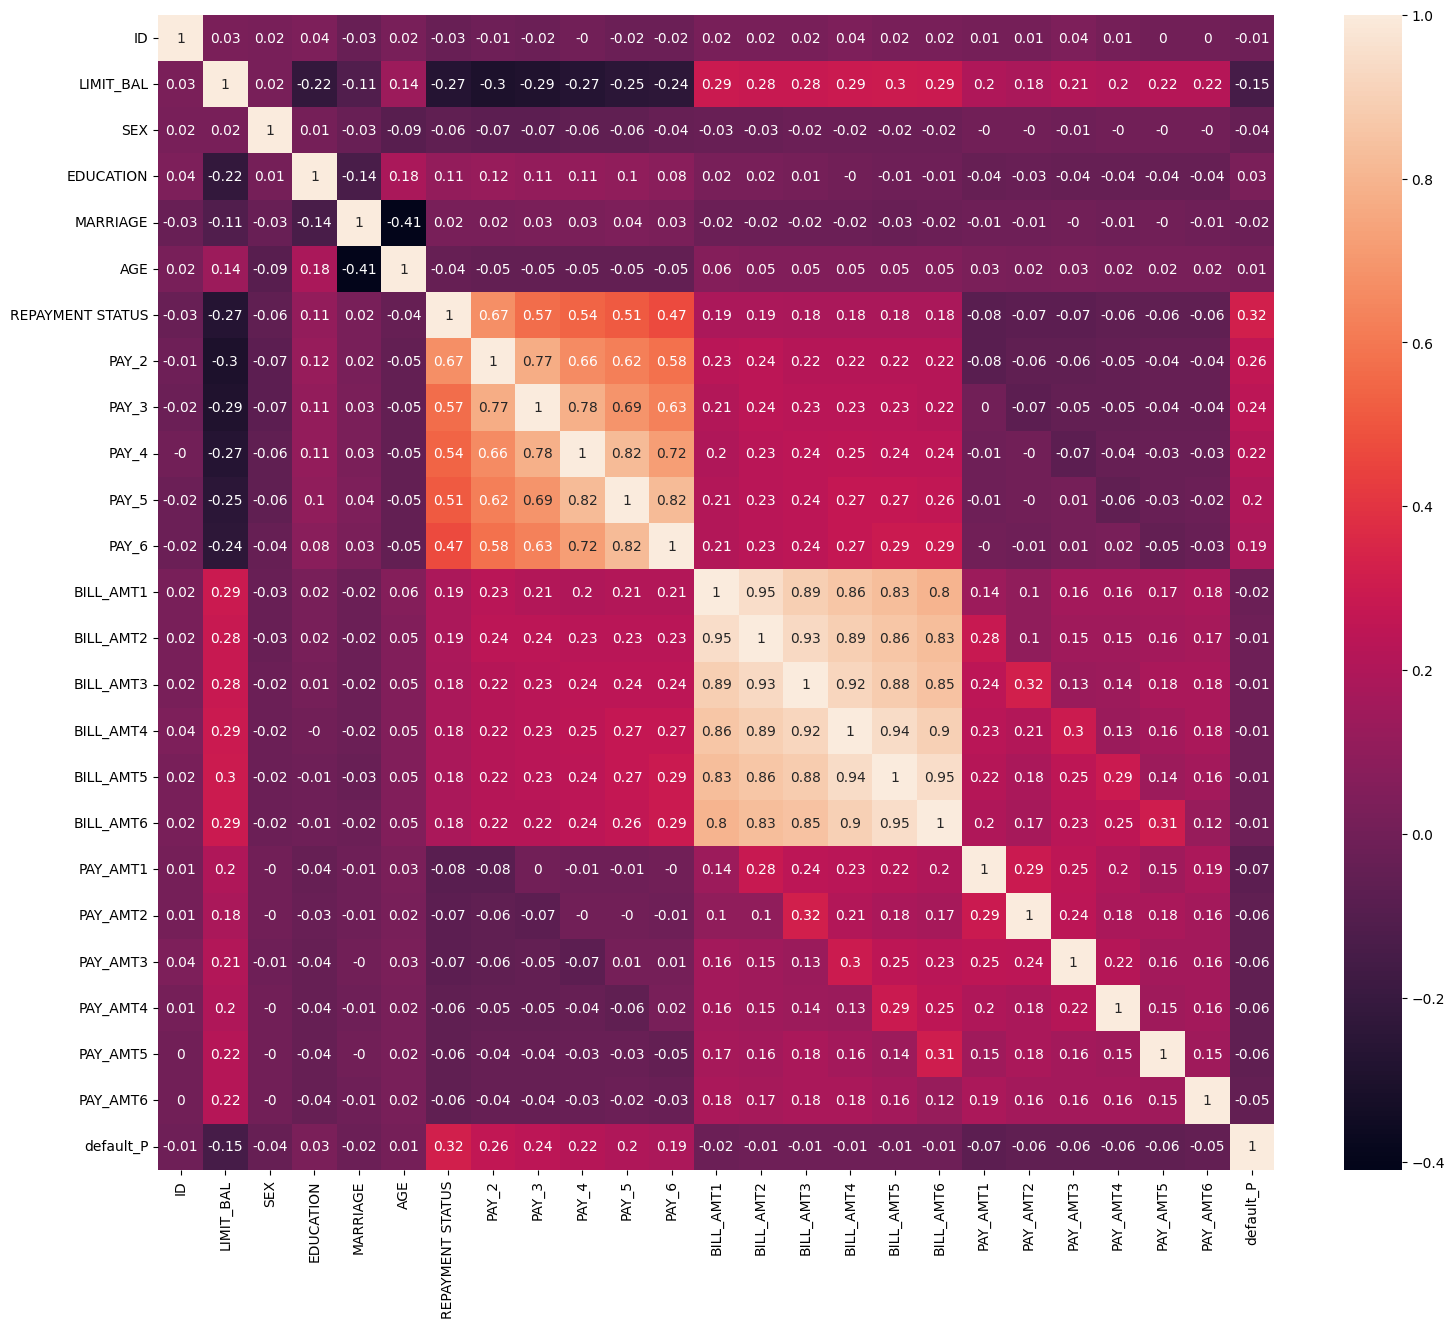

In [25]:
plt.figure(figsize = (18,15))
sns.heatmap(data = round(df.corr(),2), annot = True)
plt.show()

In [17]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [26]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAYMENT STATUS,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_P
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [28]:

import statsmodels as sm
from statsmodels.stats import outliers_influence

#df = df.drop(columns=['default_P'])
# Calculate VIF values
vif = pd.DataFrame()
vif["variables"] = df.columns
vif["VIF"] = [sm.stats.outliers_influence.variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Print VIF values
print(vif)

           variables        VIF
0                 ID   3.901483
1          LIMIT_BAL   4.046691
2                SEX   9.257822
3          EDUCATION   6.798290
4           MARRIAGE   6.457641
5                AGE  11.400140
6   REPAYMENT STATUS   1.997811
7              PAY_2   3.216889
8              PAY_3   3.730003
9              PAY_4   4.445615
10             PAY_5   4.990164
11             PAY_6   3.463893
12         BILL_AMT1  20.844042
13         BILL_AMT2  38.228082
14         BILL_AMT3  31.783330
15         BILL_AMT4  29.699788
16         BILL_AMT5  36.078613
17         BILL_AMT6  21.427596
18          PAY_AMT1   1.908606
19          PAY_AMT2   2.385670
20          PAY_AMT3   1.911829
21          PAY_AMT4   1.807558
22          PAY_AMT5   1.854910
23          PAY_AMT6   1.270804
24         default_P   1.451413


#### Dropping unnecessary columns due to Multicollinearity

In [29]:
X = df.drop(columns = ['ID','default_P','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                       'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'])

In [10]:
# X = df.drop(columns = ['ID','default_P','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
 #                      'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'])

### Independent Features

In [30]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAYMENT STATUS,BILL_AMT1,PAY_AMT1
0,20000.0,2,2,1,24,2,3913.0,0.0
1,120000.0,2,2,2,26,-1,2682.0,0.0
2,90000.0,2,2,2,34,0,29239.0,1518.0
3,50000.0,2,2,1,37,0,46990.0,2000.0
4,50000.0,1,2,1,57,-1,8617.0,2000.0


### Dependent Feature

In [31]:
y = df['default_P']


### Transforming Data

In [32]:
# Create Column Transformer
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [33]:
X = preprocessor.fit_transform(X)

### Separate dataset into train and test


In [34]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((24000, 8), (6000, 8))

#### Create an Evaluate Function to give all metrics after model Training

In [35]:
def evaluate_model(true, predicted):
  accuracy = accuracy_score(true, predicted)
  precision = precision_score(true, predicted)
  recall = recall_score(true, predicted)
  f1 = f1_score(true, predicted)
  auc_roc = roc_auc_score(true, predicted)
  return accuracy, precision, recall, f1, auc_roc

### Training Models

In [36]:
models = {
    "Logistic Regression": LogisticRegression(),
    "RandomForest Classifier": RandomForestClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Support Vector Classifier": SVC(),
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "XGB Classifier": XGBClassifier()
}
model_list = []
f1_score_list =[]
recall_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_precision, model_train_recall, model_train_f1, model_train_auc_roc  = evaluate_model(y_train, y_train_pred)
    model_test_accuracy, model_test_precision, model_test_recall, model_test_f1, model_test_auc_roc = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("- AUC_ROC: {:.4f}".format(model_train_auc_roc))

    print('------------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print("- AUC_ROC: {:.4f}".format(model_test_auc_roc))
    f1_score_list.append(model_test_f1)
    recall_list.append(model_test_recall)

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.8114
- Precision: 0.7205
- Recall: 0.2446
- F1 Score: 0.3652
- AUC_ROC: 0.6088
------------------------------------
Model performance for Test set
- Accuracy: 0.8072
- Precision: 0.6765
- Recall: 0.2277
- F1 Score: 0.3407
- AUC_ROC: 0.5986


RandomForest Classifier
Model performance for Training set
- Accuracy: 0.9986
- Precision: 0.9979
- Recall: 0.9959
- F1 Score: 0.9969
- AUC_ROC: 0.9976
------------------------------------
Model performance for Test set
- Accuracy: 0.8067
- Precision: 0.6024
- Recall: 0.3427
- F1 Score: 0.4369
- AUC_ROC: 0.6397


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.8196
- Precision: 0.6931
- Recall: 0.3351
- F1 Score: 0.4518
- AUC_ROC: 0.6464
------------------------------------
Model performance for Test set
- Accuracy: 0.8185
- Precision: 0.6818
- Recall: 0.3199
- F1 Score: 0.4355
- AUC_ROC: 0.6390


Support Vector Classifier
Model performance for Training set
- 

#### Will check the F1 Score here. Beacuse for us both False positive and False Negetive are important.

- False Positive = Not default but model predicted Deafault. This will result into business loss by not giving loans to be good customers.

- Flase Negetive = Defalut but model predicted Not-Default. This will result in giving more loans to the customers who are not paying us back. Result into business loss.

In [37]:
pd.DataFrame(list(zip(model_list, f1_score_list, recall_list)), columns=['Model Name', 'F1_Score', 'Recall']).sort_values(by=["F1_Score"],ascending=False)

,Model Name,F1_Score,Recall
4,CatBoost Classifier,0.453850,0.338919
5,XGB Classifier,0.441743,0.332064
1,RandomForest Classifier,0.436893,0.342727
2,AdaBoost Classifier,0.435459,0.319878
3,Support Vector Classifier,0.429926,0.310739
0,Logistic Regression,0.340741,0.227723


In [36]:
model = CatBoostClassifier(max_depth = 5, n_estimators= 200, verbose=False)
model.fit(X_train, y_train) # Train model

# Make predictions
y_test_pred = model.predict(X_test)
evaluate_model(y_test, y_test_pred)

(0.822,
 0.6870229007633588,
 0.3427265803503427,
 0.45731707317073167,
 0.6494942908152396)

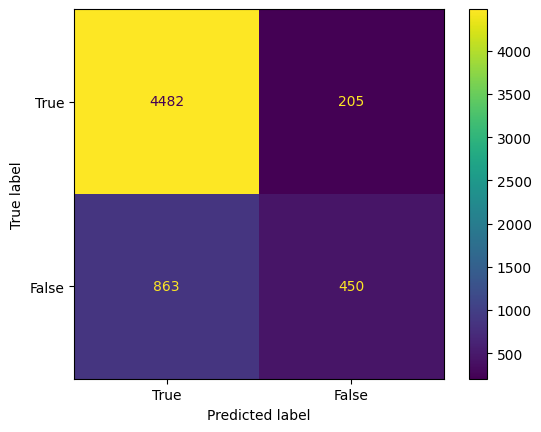

In [37]:
3, 435
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.show()